Chris Panican <br>
Machine Learning <br>
Assignment Due Week 09 <br>
4/16/2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


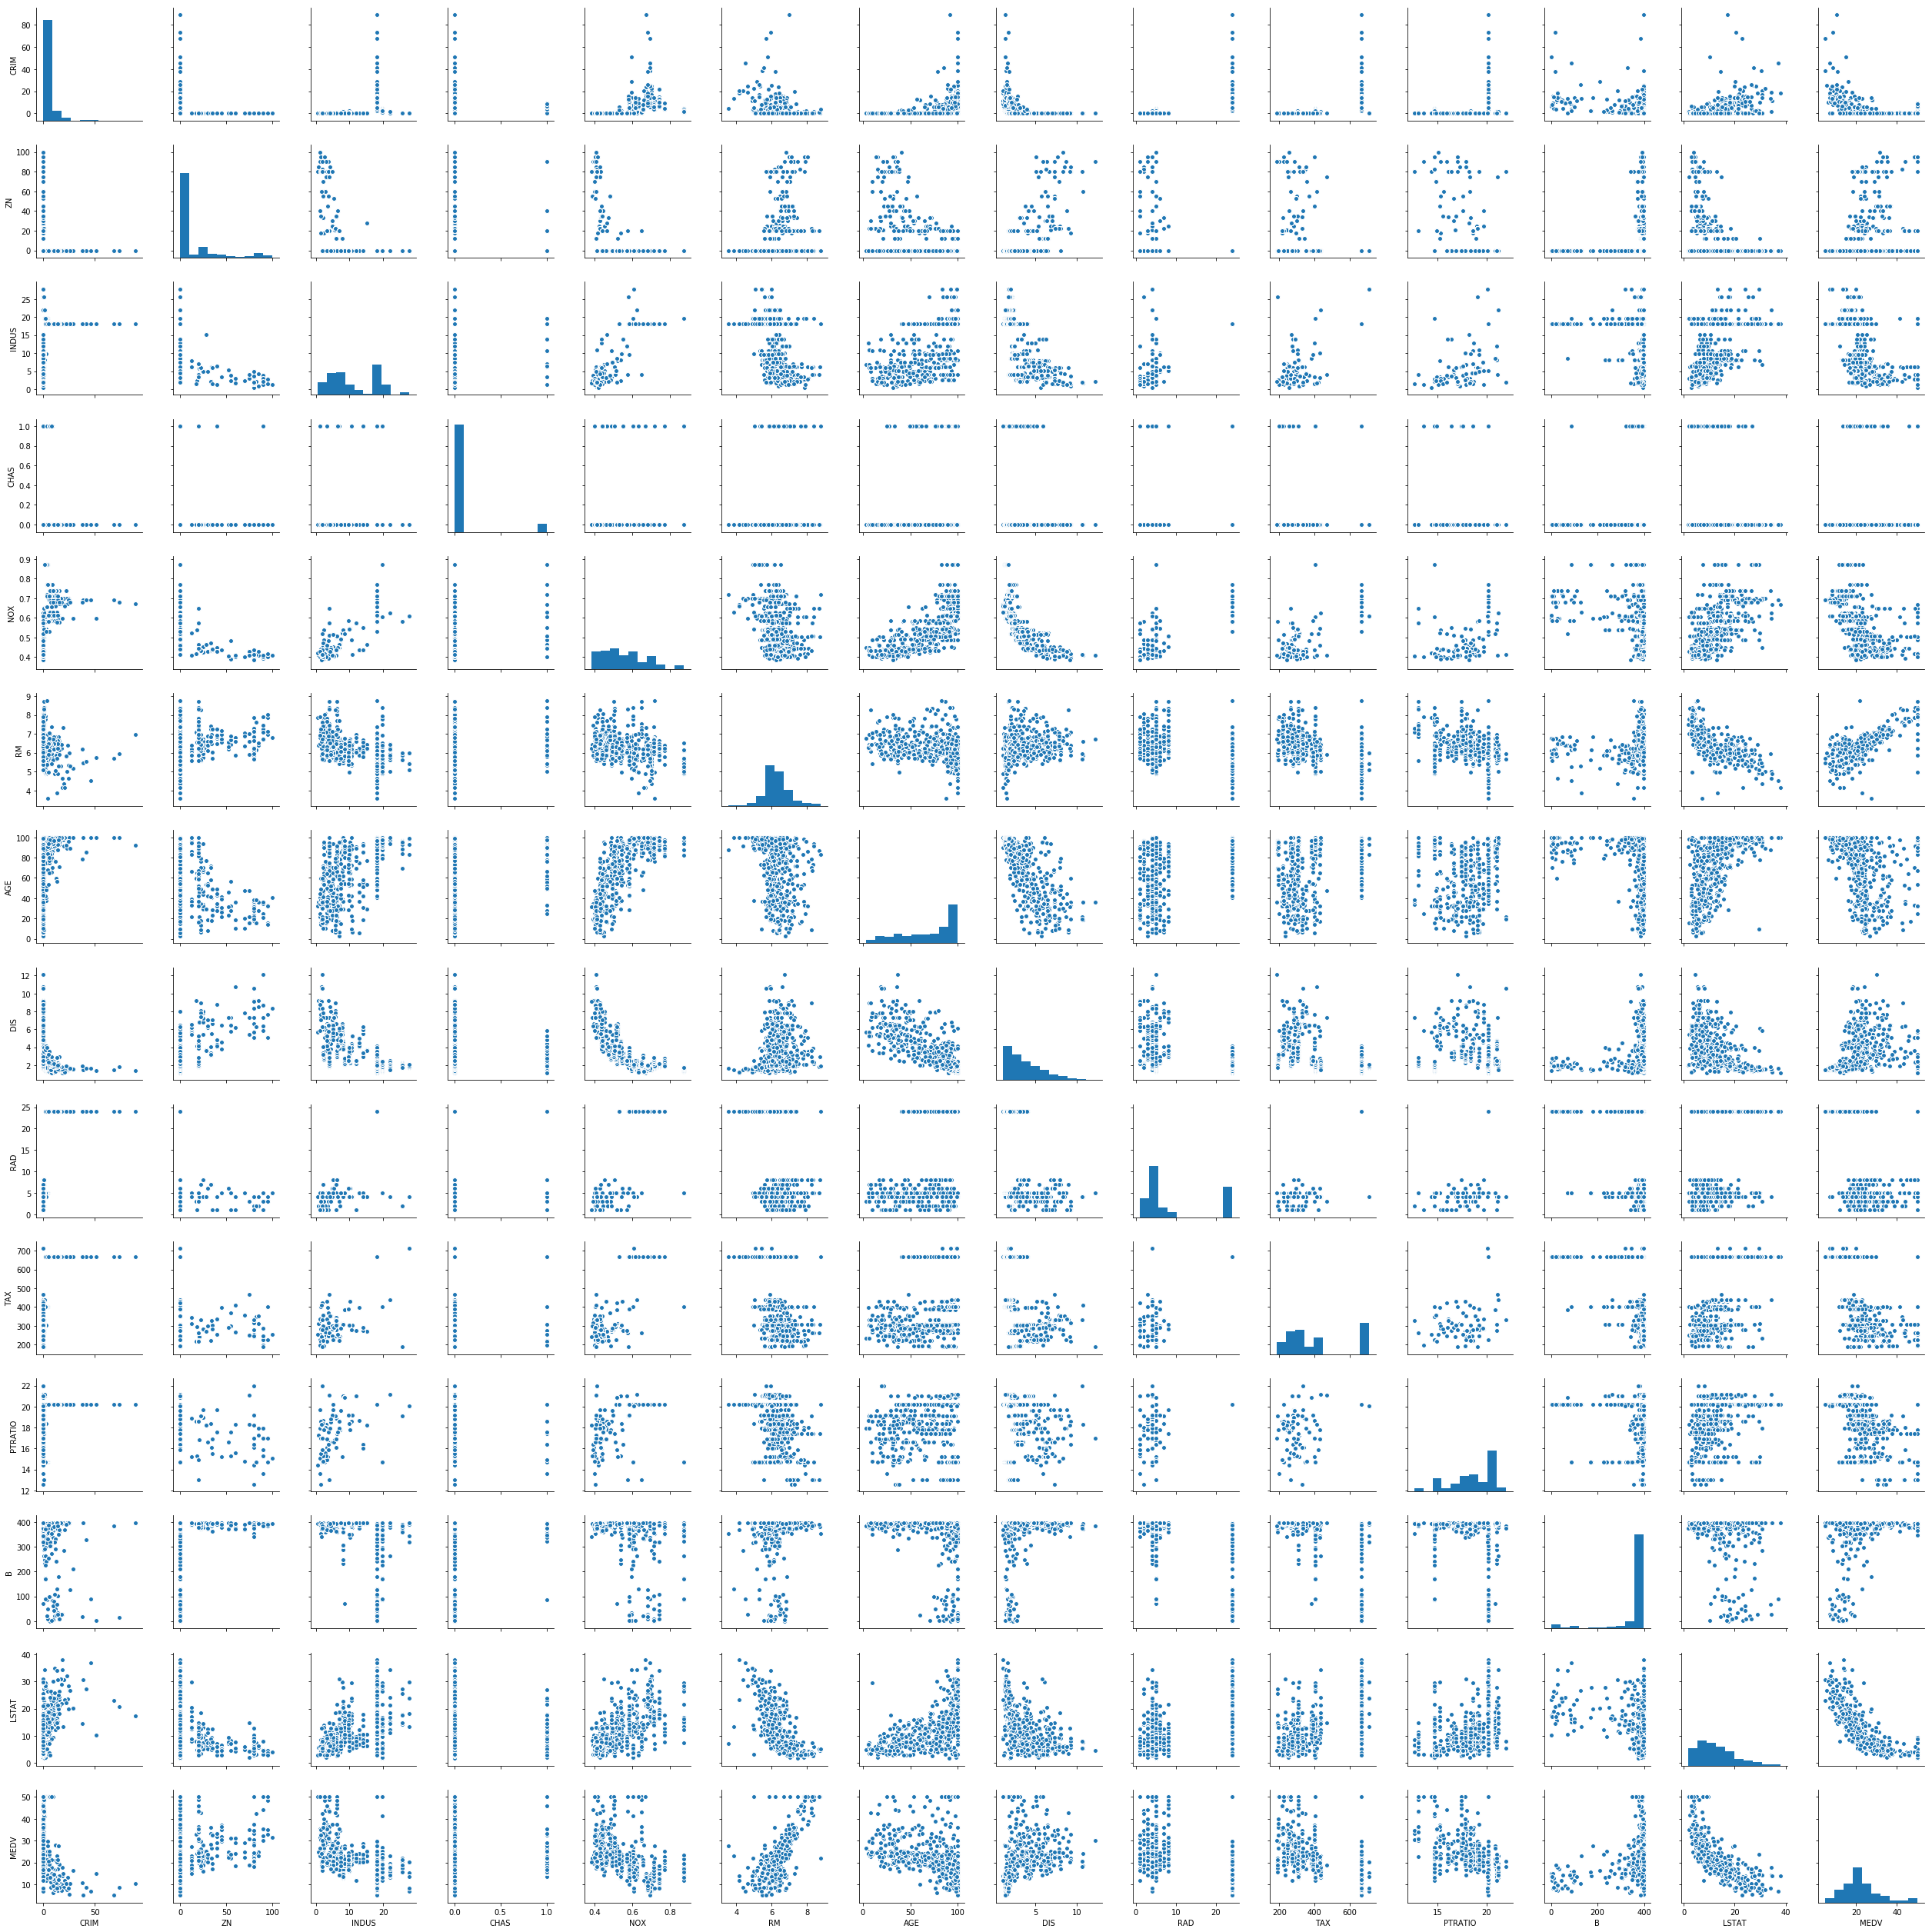

In [3]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

## Pick a number of features that you think may be correlated and plot pairs of them to confirm that they are correlated.

In [4]:
data = df.iloc[:,:].values

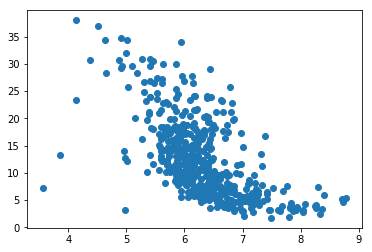

In [5]:
# RM and LSTAT
plt.close()
plt.scatter(data[:,5], data[:,12])
plt.show()

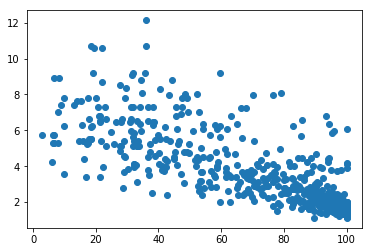

In [6]:
# AGE and DIS
plt.close()
plt.scatter(data[:,6], data[:,7])
plt.show()

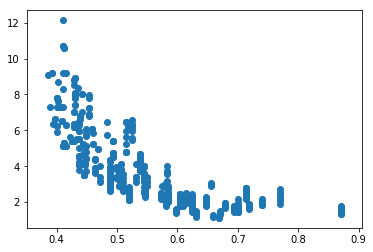

In [7]:
# LSTAT and MEDV
plt.close()
plt.scatter(data[:,4], data[:,7])
plt.show()

## Pick two features that you think can be predicted by the other features in the dataset. The feature to be predicted needs to have numerical values.

In [8]:
# Helper function that prints validation data and test data
def print_validation_test_data(regressors, feature_num, test_size, random_state):
    X_features = [x for x in range(data.shape[1]) if x != feature_num]
    X = data[:,X_features]
    y = data[:,feature_num]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the regressors
    method = regressors
    method.fit(X_train, y_train)
    y_train_pred = method.predict(X_train)
    y_test_pred = method.predict(X_test)
    
    # Train_score and test_score
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    validation_score = method.score(X_val, y_val)
    
    # Print
    reg_name = str(regressors).split('(', 1)[0]
    print("{}\nTraining: {}\nValidation: {}\nTest: {}\n".format(reg_name, train_score, validation_score, test_score))

### Feature 7

In [9]:
regressors = [LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=1.0), ElasticNet(alpha=1.0), SVR(C=1.0)]

feature_num = 7
test_size = 0.2
random_state = 1

for i in regressors:
    print_validation_test_data(i, feature_num, test_size, random_state)

LinearRegression
Training: 0.7859227177938977
Validation: 0.7805341008248954
Test: 0.7000968173992947

Ridge
Training: 0.7812037063639314
Validation: 0.7817279544436826
Test: 0.6916747207300686

Lasso
Training: 0.727602408008887
Validation: 0.7397584089319383
Test: 0.6300403764344983

ElasticNet
Training: 0.744870381848411
Validation: 0.7500695320111564
Test: 0.6553690244398696

SVR
Training: 0.5071052525579625
Validation: 0.5774540917584183
Test: 0.023207239646947153



### Feature 12

In [10]:
feature_num = 12
for i in regressors:
    print_validation_test_data(i, feature_num, test_size, random_state)

LinearRegression
Training: 0.7338685634467159
Validation: 0.670839003221114
Test: 0.6536594929115982

Ridge
Training: 0.7338032709743731
Validation: 0.6710990640748251
Test: 0.6541750327357432

Lasso
Training: 0.6956367851540768
Validation: 0.6655983632667071
Test: 0.6268734272845243

ElasticNet
Training: 0.7029979342182491
Validation: 0.6675189724563692
Test: 0.6345922709428635

SVR
Training: 0.20447246262027685
Validation: 0.17257812500572922
Test: 0.028509897825024777



## Discussion of findings

For this assignment, we used a housing dataset that has many different features. We were tasked to pick a number of features that may be correlated and plot them. One can start by classifying each feature one-by-one and analyzing whether each feature are correlated. Fortunately, there is an easy way by using the `seaborn` package and plot all the features at once and eye-pick the features that look correlated to each other. I noticed that (5,12), (6,7), and (4,7) are well correlated which I showed above. In addition, I also noticed that feature 12 and 13 are mostly correlated to other features as well. Therefore, as a part of this assignment, I applied various Scikit Learn regression methods to mentioned features.

I separated the data into training, validation, and test sets and showed how each regression method fared. It was noticable that Support Vector Regession performed the worst on both features while Linear Regression and Ridge Regression performed well. 

Most linearly based regression methods did really well since the feature that were chosen are mostly linearly correlated to other features. This means that the amount of mean square error will be low on these methods. Linear and Ridge Regression are very similar to each other, the only difference is that Ridge Regression is more stable and might yeild worse results. Lasso Regression is expected to perform a little worse then Linear and Ridge because the way it's minimizing the error is based on using sparse solutions. ElasticNet works very similarly between Ridge and Lasso because it uses both L1 and L2 regularization. SVR was expected to perform the worst because the algorithm is inspired by Support Vector Machine. Since our chosen features are non-linearly separable with most features, hence, a low score is expected.